In [1]:
# pip install yfinance

In [2]:
from datetime import date, timedelta

days = 100

today = date.today()
start_date = today - timedelta(days=days)
end_date = today
start_date = start_date.strftime('%Y-%m-%d')
end_date = end_date.strftime('%Y-%m-%d')
print(f"Start Date: {start_date}")
print(f"End Date: {end_date}")

Start Date: 2025-03-20
End Date: 2025-06-28


In [3]:
import yfinance as yf 
import pandas as pd 

data = yf.download('BTC-USD',start=start_date,end=end_date)
data

/tmp/ipykernel_14572/435106689.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('BTC-USD',start=start_date,end=end_date)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2025-03-20,84167.195312,87443.265625,83647.195312,86872.953125,29028988961
2025-03-21,84043.242188,84782.273438,83171.070312,84164.539062,19030452299
2025-03-22,83832.484375,84513.875000,83674.781250,84046.257812,9863214091
2025-03-23,86054.375000,86094.781250,83794.914062,83831.898438,12594615537
2025-03-24,87498.914062,88758.726562,85541.195312,86070.929688,34582604933
...,...,...,...,...,...
2025-06-23,105577.773438,106116.859375,99705.750000,100987.476562,65237759656
2025-06-24,106045.632812,106316.828125,104740.242188,105571.515625,48822986421


In [4]:
data['Date'] = data.index
# date.reset_index(drop=True,inplace=True)
data.reset_index(drop=True,inplace=True)
data.rename(columns={
    'Open': 'open',
    'High': 'high',
    'Low': 'low',
    'Close': 'close', # Renamed to lowercase 'close' for consistency if desired
    'Adj Close': 'adj_close', # Often present, good to rename if keeping
    'Volume': 'volume',
    'Date': 'date' # The 'Date' column you added
}, inplace=True)

data

Price,close,high,low,open,volume,date
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,
0,84167.195312,87443.265625,83647.195312,86872.953125,29028988961,2025-03-20
1,84043.242188,84782.273438,83171.070312,84164.539062,19030452299,2025-03-21
2,83832.484375,84513.875000,83674.781250,84046.257812,9863214091,2025-03-22
3,86054.375000,86094.781250,83794.914062,83831.898438,12594615537,2025-03-23
4,87498.914062,88758.726562,85541.195312,86070.929688,34582604933,2025-03-24
...,...,...,...,...,...,...
95,105577.773438,106116.859375,99705.750000,100987.476562,65237759656,2025-06-23
96,106045.632812,106316.828125,104740.242188,105571.515625,48822986421,2025-06-24
97,107361.257812,108168.398438,105881.390625,106047.406250,51624120283,2025-06-25


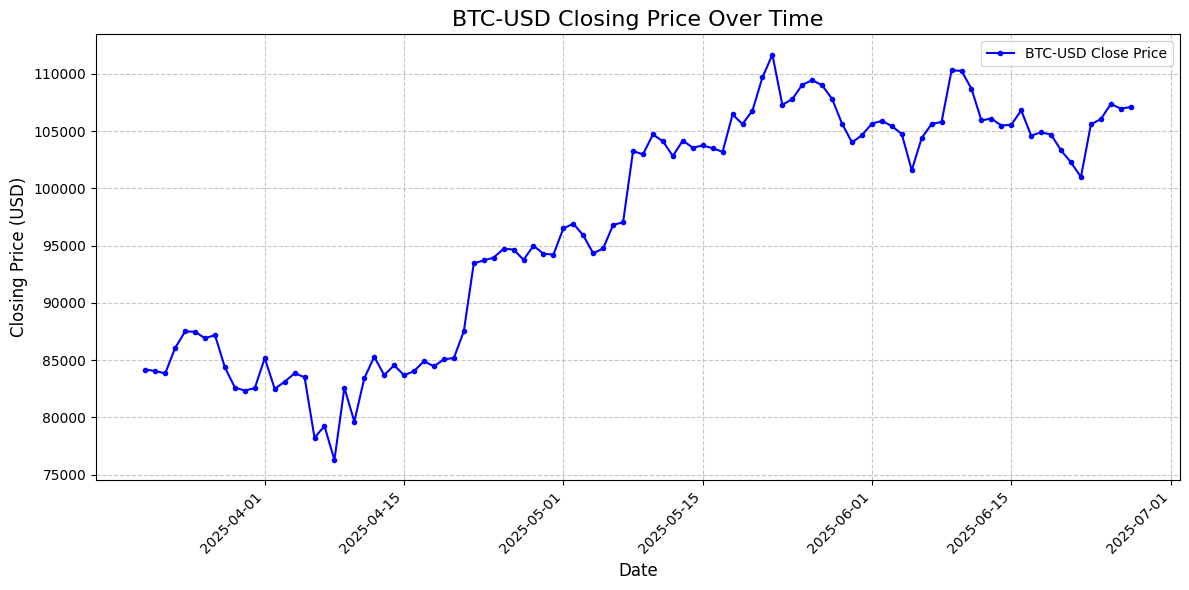

In [7]:
# --- Plotting Improvements ---
dates = data['date']
prices = data['close']

plt.figure(figsize=(12, 6)) # Create a figure and set its size (width, height in inches)

plt.plot(dates, prices, color='blue', linestyle='-', linewidth=1.5, marker='o', markersize=3, label='BTC-USD Close Price')

# Add title and labels
plt.title('BTC-USD Closing Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis labels for better visibility if dates overlap
plt.xticks(rotation=45, ha='right') # ha='right' aligns the end of the label with the tick


# Add a legend if you have multiple lines (good practice even for one)
plt.legend()

# Add tight layout to prevent labels from being cut off
plt.tight_layout()

# Display the plot
plt.show()

In [11]:
import numpy as np

def create_dataset(series , window_size: int = 20) -> tuple[np.ndarray, np.ndarray]:
    """
    Creates a dataset for time series forecasting by generating sequences (X)
    and their corresponding next values (y).

    Args:
        series (pd.Series or np.ndarray): The input time series data (e.g., stock prices).
                                          Expected to be a 1D array-like structure.
        window_size (int, optional): The number of previous time steps to use as
                                     input features (the length of each sequence).
                                     Defaults to 20.

    Returns:
        tuple[np.ndarray, np.ndarray]: A tuple containing:
            - x_data (np.ndarray): An array of sequences (windows), where each
                                   row is a sequence of `window_size` values.
                                   Shape: (num_samples, window_size)
            - y_data (np.ndarray): An array of target values, where each value
                                   is the data point immediately following its
                                   corresponding sequence in `x_data`.
                                   Shape: (num_samples,)
    """
    x_data = []
    y_data = []

    # The loop should go up to len(series) - window_size
    # because the last sequence starts at index (len(series) - window_size - 1)
    # and the target will be at (len(series) - 1).
    # If the last sequence is series[i:i+window_size], the target is series[i+window_size].
    # So 'i+window_size' must be less than len(series).
    # The max value for 'i' will be len(series) - window_size - 1
    for i in range(len(series) - window_size): # Corrected range end
        a = series[i : i + window_size]
        b = series[i + window_size]
        x_data.append(a)
        y_data.append(b)

    return np.array(x_data), np.array(y_data)

# --- Example Usage ---
if __name__ == "__main__":
    # Example 1: Using a simple numpy array
    test_series_np = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    window = 3
    X_np, y_np = create_dataset(test_series_np, window)
    print("--- Example with numpy array ---")
    print(f"Original Series: {test_series_np}")
    print(f"Window Size: {window}")
    print("X_np (sequences):")
    print(X_np)
    print("y_np (targets):")
    print(y_np)
    print(f"Shapes: X_np {X_np.shape}, y_np {y_np.shape}")
    print("-" * 30)
 

--- Example with numpy array ---
Original Series: [ 1  2  3  4  5  6  7  8  9 10]
Window Size: 3
X_np (sequences):
[[1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]
 [5 6 7]
 [6 7 8]
 [7 8 9]]
y_np (targets):
[ 4  5  6  7  8  9 10]
Shapes: X_np (7, 3), y_np (7,)
------------------------------


In [12]:
# pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [13]:
from sklearn.preprocessing import MinMaxScaler 

window_size = 20 
sc = MinMaxScaler(feature_range=(0,1))
X = data['close']
X = sc.fit_transform(X)

x,y = create_dataset(X)


In [16]:
x.shape , y.shape

((80, 20, 1), (80, 1))

In [17]:
from sklearn.model_selection import train_test_split 

x_train,x_test , y_train,y_test = train_test_split(x,y,random_state=0)

In [18]:
x_train.shape

(60, 20, 1)

In [20]:
# pip install keras

In [24]:
from keras.models import Sequential 
from keras.layers import Input,Dense,LSTM
from keras.losses import MeanSquaredError


# --- Model Definition ---
model = Sequential()
model.add(Input(shape=(x_train.shape[1], 1)))
model.add(LSTM(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss=MeanSquaredError(), optimizer='adam', metrics=['mse'])

model.summary()

2025-06-28 15:48:33.139955: W tensorflow/compiler/mlir/tools/kernel_gen/tf_gpu_runtime_wrappers.cc:40] 'cuModuleLoadData(&module, data)' failed with 'CUDA_ERROR_NO_BINARY_FOR_GPU'

2025-06-28 15:48:33.140019: W tensorflow/compiler/mlir/tools/kernel_gen/tf_gpu_runtime_wrappers.cc:40] 'cuModuleGetFunction(&function, module, kernel_name)' failed with 'CUDA_ERROR_INVALID_HANDLE'

2025-06-28 15:48:33.140046: W tensorflow/core/framework/op_kernel.cc:1829] INTERNAL: 'cuLaunchKernel(function, gridX, gridY, gridZ, blockX, blockY, blockZ, 0, reinterpret_cast<CUstream>(stream), params, nullptr)' failed with 'CUDA_ERROR_INVALID_HANDLE'
2025-06-28 15:48:33.140072: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: INTERNAL: 'cuLaunchKernel(function, gridX, gridY, gridZ, blockX, blockY, blockZ, 0, reinterpret_cast<CUstream>(stream), params, nullptr)' failed with 'CUDA_ERROR_INVALID_HANDLE'


InternalError: {{function_node __wrapped__Cast_device_/job:localhost/replica:0/task:0/device:GPU:0}} 'cuLaunchKernel(function, gridX, gridY, gridZ, blockX, blockY, blockZ, 0, reinterpret_cast<CUstream>(stream), params, nullptr)' failed with 'CUDA_ERROR_INVALID_HANDLE' [Op:Cast] name: 

In [ ]:
pip install tensorflow tensorflow-gpu keras

